In [1]:

import numpy as np
import pandas as pd 
\

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


#import relevant libraries

%matplotlib inline
import matplotlib.pyplot as plt
from glob import glob
import seaborn as sns
from PIL import Image
#from imutils import paths
import random
import pickle
import cv2
import datetime
from pprint import pprint
import librosa

from sklearn.model_selection import *
from sklearn.preprocessing import *
from sklearn.metrics import *

import keras
from keras.regularizers import *
from keras.initializers import glorot_uniform

import keras.backend as K
K.clear_session()

from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import *
import warnings
warnings.filterwarnings('ignore')

/kaggle/input/nbaiot-dataset/7.gafgyt.combo.csv
/kaggle/input/nbaiot-dataset/9.gafgyt.combo.csv
/kaggle/input/nbaiot-dataset/5.gafgyt.combo.csv
/kaggle/input/nbaiot-dataset/1.mirai.udp.csv
/kaggle/input/nbaiot-dataset/4.gafgyt.udp.csv
/kaggle/input/nbaiot-dataset/6.gafgyt.udp.csv
/kaggle/input/nbaiot-dataset/6.gafgyt.junk.csv
/kaggle/input/nbaiot-dataset/data_summary.csv
/kaggle/input/nbaiot-dataset/5.gafgyt.udp.csv
/kaggle/input/nbaiot-dataset/9.gafgyt.junk.csv
/kaggle/input/nbaiot-dataset/9.mirai.scan.csv
/kaggle/input/nbaiot-dataset/1.benign.csv
/kaggle/input/nbaiot-dataset/2.mirai.udpplain.csv
/kaggle/input/nbaiot-dataset/3.gafgyt.combo.csv
/kaggle/input/nbaiot-dataset/4.gafgyt.combo.csv
/kaggle/input/nbaiot-dataset/6.mirai.scan.csv
/kaggle/input/nbaiot-dataset/5.mirai.udp.csv
/kaggle/input/nbaiot-dataset/3.benign.csv
/kaggle/input/nbaiot-dataset/3.gafgyt.junk.csv
/kaggle/input/nbaiot-dataset/7.gafgyt.scan.csv
/kaggle/input/nbaiot-dataset/features.csv
/kaggle/input/nbaiot-dataset/6

2024-06-19 06:35:29.791772: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-19 06:35:29.791873: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-19 06:35:29.911516: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
benign=pd.read_csv('/kaggle/input/nbaiot-dataset/1.benign.csv')
gc= pd.read_csv('/kaggle/input/nbaiot-dataset/1.gafgyt.combo.csv')
gj=pd.read_csv('/kaggle/input/nbaiot-dataset/1.gafgyt.junk.csv')
gs=pd.read_csv('/kaggle/input/nbaiot-dataset/1.gafgyt.scan.csv')
gu=pd.read_csv('/kaggle/input/nbaiot-dataset/1.gafgyt.udp.csv')
ma =pd.read_csv('/kaggle/input/nbaiot-dataset/1.mirai.ack.csv')
msc=pd.read_csv('/kaggle/input/nbaiot-dataset/1.mirai.scan.csv')
msy=pd.read_csv('/kaggle/input/nbaiot-dataset/1.mirai.syn.csv')
mu =pd.read_csv('/kaggle/input/nbaiot-dataset/1.mirai.udp.csv')
mup=pd.read_csv('/kaggle/input/nbaiot-dataset/1.mirai.udpplain.csv')

In [3]:
benign['type']='benign'
gc['type']='gafgyt.combo'
gj['type']='gafgyt.junk'
gs['type']='gafgyt.scan'
gu['type']='gafgyt.udp'
ma['type']='mirai.ack'
msc['type']='mirai.scan'
msy['type']='mirai.syn'
mu['type']='mirai.udp'
mup['type']='mirai.udpplain'


In [4]:
df=pd.concat([benign,gc,gj,gs,gu,ma,msc,msy,mu,mup],
sort=False,axis=0,ignore_index=True)

In [5]:
df.groupby('type')['type'].count()

type
benign             49548
gafgyt.combo       59718
gafgyt.junk        29068
gafgyt.scan        29849
gafgyt.udp        105874
mirai.ack         102195
mirai.scan        107685
mirai.syn         122573
mirai.udp         237665
mirai.udpplain     81982
Name: type, dtype: int64

In [6]:
sampler=np.random.permutation(len(df))
df=df.take(sampler)
df

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,type
798859,97.874243,496.652528,25040.918711,178.969122,454.227773,39332.981182,602.661507,404.742651,51454.522321,6386.919336,...,0.0,0.0,1.000000,554.0,0.000000,554.0,0.000000e+00,0.0,0.0,mirai.udp
161591,31.507497,74.073679,13.018710,40.136521,74.588625,363.173101,75.436628,84.844139,8208.577553,842.306452,...,0.0,0.0,2.898475,74.0,0.000000,74.0,0.000000e+00,0.0,0.0,gafgyt.scan
863270,162.634527,212.911565,52156.366384,229.893962,246.023880,57290.909405,557.303029,299.649863,60953.692167,5042.079464,...,0.0,0.0,11891.084102,554.0,0.000048,554.0,2.270099e-09,0.0,0.0,mirai.udpplain
356361,78.382762,535.766086,14378.050147,151.344735,495.458624,30708.306367,560.113718,430.967346,50085.064895,6228.403599,...,0.0,0.0,1.000000,566.0,0.000000,566.0,0.000000e+00,0.0,0.0,mirai.ack
551772,113.103331,70.271957,38.345986,191.710435,70.488708,36.873373,626.556762,69.954231,40.292965,6658.592948,...,0.0,0.0,1.000000,60.0,0.000000,60.0,0.000000e+00,0.0,0.0,mirai.syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60824,175.318661,74.067775,4.217494,275.807377,74.076084,30.615266,629.989191,74.996174,799.944502,5205.535691,...,0.0,0.0,1.000000,74.0,0.000000,74.0,0.000000e+00,0.0,0.0,gafgyt.combo
687711,140.225096,361.081912,58084.146847,231.742698,355.942260,58613.655035,673.827909,371.181335,56889.379796,6534.437140,...,0.0,0.0,1.000000,554.0,0.000000,554.0,0.000000e+00,0.0,0.0,mirai.udp
613305,113.425002,468.082816,35061.326290,202.833337,431.156526,45594.157056,637.836260,396.740966,52955.556712,5840.804534,...,0.0,0.0,1.000000,554.0,0.000000,554.0,0.000000e+00,0.0,0.0,mirai.udp
814622,123.227571,396.780459,52946.575442,199.917819,410.476417,50297.033478,616.492382,398.398560,52649.416602,6346.309732,...,0.0,0.0,1.000000,60.0,0.000000,60.0,0.000000e+00,0.0,0.0,mirai.udp


In [7]:
labels_full=pd.get_dummies(df['type'], prefix='type')
labels_full.head()

,type_benign,type_gafgyt.combo,type_gafgyt.junk,type_gafgyt.scan,type_gafgyt.udp,type_mirai.ack,type_mirai.scan,type_mirai.syn,type_mirai.udp,type_mirai.udpplain
798859,False,False,False,False,False,False,False,False,True,False
161591,False,False,False,True,False,False,False,False,False,False
863270,False,False,False,False,False,False,False,False,False,True
356361,False,False,False,False,False,True,False,False,False,False
551772,False,False,False,False,False,False,False,True,False,False


In [8]:
df=df.drop(columns='type')
df.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
798859,97.874243,496.652528,25040.918711,178.969122,454.227773,39332.981182,602.661507,404.742651,51454.522321,6386.919336,...,0.000000e+00,0.0,0.0,1.000000,554.0,0.000000,554.0,0.000000e+00,0.0,0.0
161591,31.507497,74.073679,13.018710,40.136521,74.588625,363.173101,75.436628,84.844139,8208.577553,842.306452,...,1.818989e-12,0.0,0.0,2.898475,74.0,0.000000,74.0,0.000000e+00,0.0,0.0
863270,162.634527,212.911565,52156.366384,229.893962,246.023880,57290.909405,557.303029,299.649863,60953.692167,5042.079464,...,1.164153e-10,0.0,0.0,11891.084102,554.0,0.000048,554.0,2.270099e-09,0.0,0.0
356361,78.382762,535.766086,14378.050147,151.344735,495.458624,30708.306367,560.113718,430.967346,50085.064895,6228.403599,...,0.000000e+00,0.0,0.0,1.000000,566.0,0.000000,566.0,0.000000e+00,0.0,0.0
551772,113.103331,70.271957,38.345986,191.710435,70.488708,36.873373,626.556762,69.954231,40.292965,6658.592948,...,0.000000e+00,0.0,0.0,1.000000,60.0,0.000000,60.0,0.000000e+00,0.0,0.0


In [9]:
def standardize(df,col):
    df[col]= (df[col]-df[col].mean())/df[col].std()

data_st=df.copy()
for i in (data_st.iloc[:,:-1].columns):
    standardize (data_st,i)

data_st.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
798859,-0.105519,1.758463,0.132199,0.147331,1.565874,0.558799,0.465635,1.279720,0.909527,0.712899,...,-0.011483,-0.010213,-0.011563,-0.216366,1.550013,-0.015623,1.543711,-0.011617,-0.010535,0.0
161591,-1.225214,-0.797341,-0.846245,-1.332853,-0.836210,-0.879062,-1.469299,-0.802359,-0.625015,-1.413772,...,-0.011483,-0.010213,-0.011563,-0.215860,-0.605707,-0.015623,-0.621709,-0.011617,-0.010535,0.0
863270,0.987074,0.042366,1.192253,0.690274,0.248509,1.221390,0.299168,0.595717,1.246597,0.197077,...,-0.011483,-0.010213,-0.011563,2.947467,1.550013,-0.015600,1.543711,-0.011617,-0.010535,0.0
356361,-0.434366,1.995027,-0.284657,-0.147190,1.826753,0.240577,0.309483,1.450405,0.860934,0.652100,...,-0.011483,-0.010213,-0.011563,-0.216366,1.603906,-0.015623,1.597847,-0.011617,-0.010535,0.0
551772,0.151416,-0.820334,-0.845255,0.283175,-0.862152,-0.891101,0.553332,-0.899270,-0.914859,0.817101,...,-0.011483,-0.010213,-0.011563,-0.216366,-0.668582,-0.015623,-0.684867,-0.011617,-0.010535,0.0


In [10]:
train_data_st=data_st.values
train_data_st

array([[-0.10551875,  1.75846344,  0.13219874, ..., -0.01161699,
        -0.01053538,  0.        ],
       [-1.22521437, -0.79734118, -0.84624492, ..., -0.01161699,
        -0.01053538,  0.        ],
       [ 0.9870737 ,  0.04236604,  1.19225322, ..., -0.01161699,
        -0.01053538,  0.        ],
       ...,
       [ 0.15684332,  1.58567059,  0.52393772, ..., -0.01161699,
        -0.01053538,  0.        ],
       [ 0.32222575,  1.15442588,  1.22314575, ..., -0.01161699,
        -0.01053538,  0.        ],
       [ 1.49060111,  0.44139616,  1.6101292 , ..., -0.01161699,
        -0.01053538,  0.        ]])

In [11]:
labels=labels_full.values
labels

array([[False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False,  True],
       ...,
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False]])

In [12]:
x_train, x_test, y_train, y_test = train_test_split(train_data_st, labels, test_size=0.2,random_state=42)
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.125,random_state=42)

print(x_train.shape)
print(x_test.shape)
print(x_validate.shape)

(648309, 115)
(185232, 115)
(92616, 115)


In [13]:
x_train_cnn = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_test_cnn = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_validate_cnn = np.reshape(x_validate, (x_validate.shape[0], x_validate.shape[1],1))
print(x_train_cnn.shape)
print(x_test_cnn.shape)
print(x_validate_cnn.shape)

(648309, 115, 1)
(185232, 115, 1)
(92616, 115, 1)


In [14]:
model = Sequential()
model.add(Dense(10, input_dim=train_data_st.shape[1], activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.add(Dense(labels.shape[1],activation='softmax'))

modelName = 'NBaIOT Model without FL'
keras.utils.plot_model(model, './'+modelName+'_Archi.png',show_shapes=True)
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 40)             │           440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           410 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │            20 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,041 (7.97 KB)

 Trainable params: 2,041 (7.97 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=5, strides=1, padding='same', input_shape = (train_data_st.shape[1], 1)))
model.add(Conv1D(filters=32, kernel_size=5, strides=1, padding='same'))
model.add(LSTM(32, activation = 'relu', return_sequences=True))
model.add(LSTM(16, return_sequences=True))  # returns a sequence of vectors of dimension 16
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(labels.shape[1],activation='softmax'))

modelName = 'CNN+LSTM'
keras.utils.plot_model(model, './'+modelName+'_Archi.png',show_shapes=True)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 115, 64)        │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 115, 32)        │        10,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 115, 32)        │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 115, 16)        │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1840)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       235,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,666 (1.02 MB)

 Trainable params: 266,666 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Build Model
inp = Input(shape=(train_data_st.shape[1], 1))
C = Conv1D(filters=32, kernel_size=5, strides=1)(inp)

C11 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(C)
A11 = Activation("relu")(C11)
C12 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A11)
S11 = Add()([C12, C])
A12 = Activation("relu")(S11)
M11 = MaxPooling1D(pool_size=5, strides=2)(A12)


C21 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M11)
A21 = Activation("relu")(C21)
C22 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A21)
S21 = Add()([C22, M11])
A22 = Activation("relu")(S11)
M21 = MaxPooling1D(pool_size=5, strides=2)(A22)


C31 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M21)
A31 = Activation("relu")(C31)
C32 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A31)
S31 = Add()([C32, M21])
A32 = Activation("relu")(S31)
M31 = MaxPooling1D(pool_size=5, strides=2)(A32)


C41 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M31)
A41 = Activation("relu")(C41)
C42 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A41)
S41 = Add()([C42, M31])
A42 = Activation("relu")(S41)
M41 = MaxPooling1D(pool_size=5, strides=2)(A42)


C51 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M41)
A51 = Activation("relu")(C51)
C52 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A51)
S51 = Add()([C52, M41])
A52 = Activation("relu")(S51)
M51 = MaxPooling1D(pool_size=5, strides=2)(A52)

F1 = Flatten()(M51)

D1 = Dense(32)(F1)
A6 = Activation("relu")(D1)
D2 = Dense(32)(A6)
D3 = Dense(labels.shape[1])(D2)
A7 = Activation("softmax")(D3)

model = Model(inputs=inp, outputs=A7)


keras.utils.plot_model(model, './Deep_residual_CNN_model.png', show_shapes=True)

modelName='Deep residual CNN'

model.summary()


Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 115, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 111, 32)   │        192 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 111, 32)   │      5,152 │ conv1d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 32)   │          0 │ conv1d_3[0][0]    │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, 111, 32)   │      5,152 │ activation[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 111, 32)   │          0 │ conv1d_4[0][0],   │
│                     │                   │            │ conv1d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 111, 32)   │          0 │ add[0][0]         │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_1     │ (None, 54, 32)    │          0 │ activation_3[0][… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_7 (Conv1D)   │ (None, 54, 32)    │      5,152 │ max_pooling1d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 54, 32)    │          0 │ conv1d_7[0][0]    │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_8 (Conv1D)   │ (None, 54, 32)    │      5,152 │ activation_4[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 54, 32)    │          0 │ conv1d_8[0][0],   │
│                     │                   │            │ max_pooling1d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_5        │ (None, 54, 32)    │          0 │ add_2[0][0]       │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_2     │ (None, 25, 32)    │          0 │ activation_5[0][… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_9 (Conv1D)   │ (None, 25, 32)    │      5,152 │ max_pooling1d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_6        │ (None, 25, 32)    │          0 │ conv1d_9[0][0]    │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_10 (Conv1D)  │ (None, 25, 32)    │      5,152 │ activation_6[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 25, 32)    │          0 │ conv1d_10[0][0],  │
│                     │                   │            │ max_pooling1d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_7        │ (None, 25, 32)    │          0 │ add_3[0][0]       │
│ (Activation)        │                   │            │                 

 Total params: 46,922 (183.29 KB)

 Trainable params: 46,922 (183.29 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:

adam = keras.optimizers.Adam() 
#sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True) 

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'Precision', 'Recall', 'AUC', keras.metrics.CategoricalCrossentropy(), keras.metrics.F1Score()])


In [18]:
epochs = 20
batch_size = 512
history=model.fit(x_train_cnn,y_train, batch_size=batch_size,
    steps_per_epoch=x_train.shape[0] // batch_size,
    epochs=epochs,
    validation_data=(x_validate_cnn,y_validate),
    #validation_split=0.10,
    
)


Epoch 1/20
   8/1266 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - AUC: 0.6021 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.2405 - categorical_crossentropy: 2.3285 - f1_score: 0.1275 - loss: 2.3285  

I0000 00:00:1718778990.118532     109 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1718778990.146729     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1266/1266 ━━━━━━━━━━━━━━━━━━━━ 27s 12ms/step - AUC: 0.9864 - Precision: 0.8849 - Recall: 0.8176 - accuracy: 0.8556 - categorical_crossentropy: 0.3895 - f1_score: 0.8168 - loss: 0.3895 - val_AUC: 0.9996 - val_Precision: 0.9780 - val_Recall: 0.9776 - val_accuracy: 0.9778 - val_categorical_crossentropy: 0.0561 - val_f1_score: 0.9550 - val_loss: 0.0561
Epoch 2/20
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 5s 474us/step - AUC: 0.9998 - Precision: 0.9658 - Recall: 0.9658 - accuracy: 0.9658 - categorical_crossentropy: 0.0530 - f1_score: 0.9381 - loss: 0.0530 - val_AUC: 0.9996 - val_Precision: 0.9823 - val_Recall: 0.9820 - val_accuracy: 0.9821 - val_categorical_crossentropy: 0.0520 - val_f1_score: 0.9618 - val_loss: 0.0520
Epoch 3/20
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - AUC: 0.9996 - Precision: 0.9867 - Recall: 0.9864 - accuracy: 0.9865 - categorical_crossentropy: 0.0405 - f1_score: 0.9718 - loss: 0.0405 - val_AUC: 0.9998 - val_Precision: 0.9957 - val_Recall: 0.9954 - val_accuracy: 0.9955 - val_c

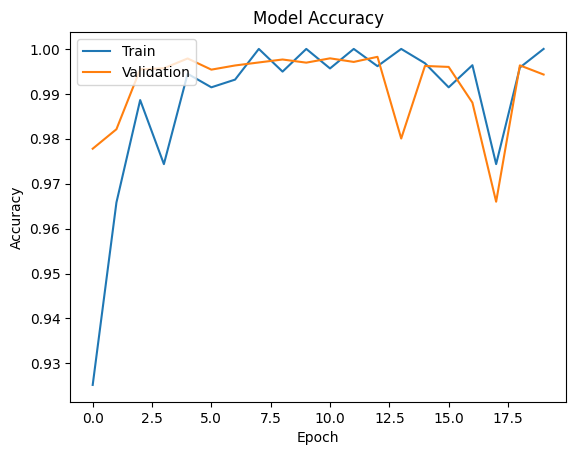

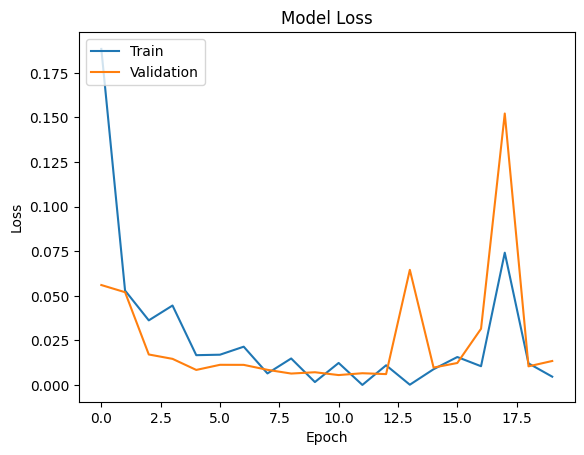

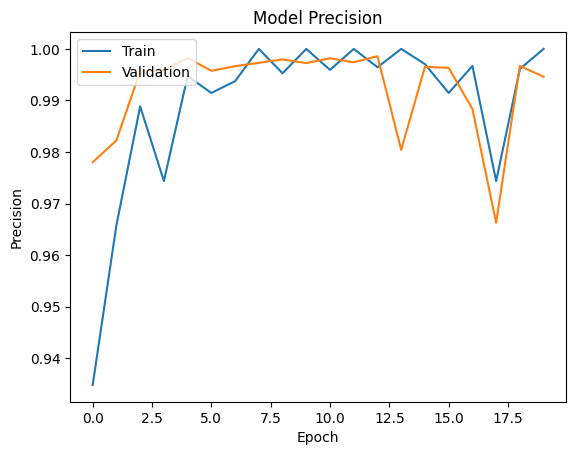

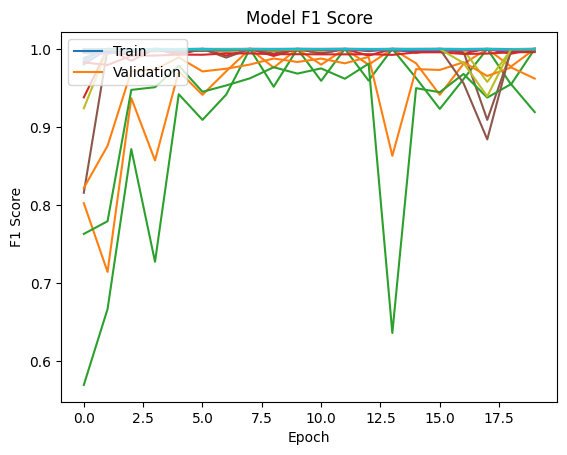

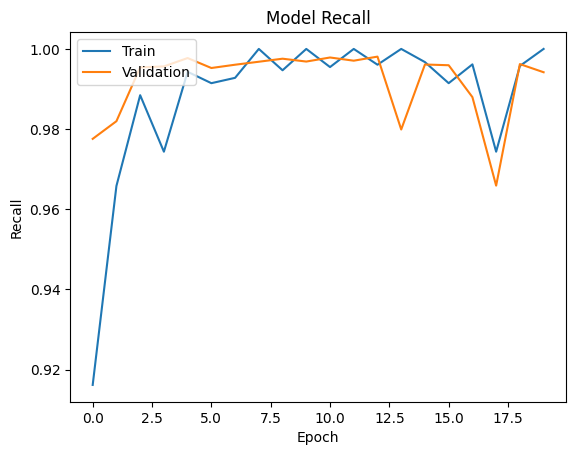

In [19]:
import matplotlib.pyplot as plt

# Plot the accuracy curve
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the loss curve
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the precision curve
plt.plot(history.history['Precision'])
plt.plot(history.history['val_Precision'])
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Plot the F1 curve
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('Model F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the recall curve
plt.plot(history.history['Recall'])
plt.plot(history.history['val_Recall'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

5789/5789 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


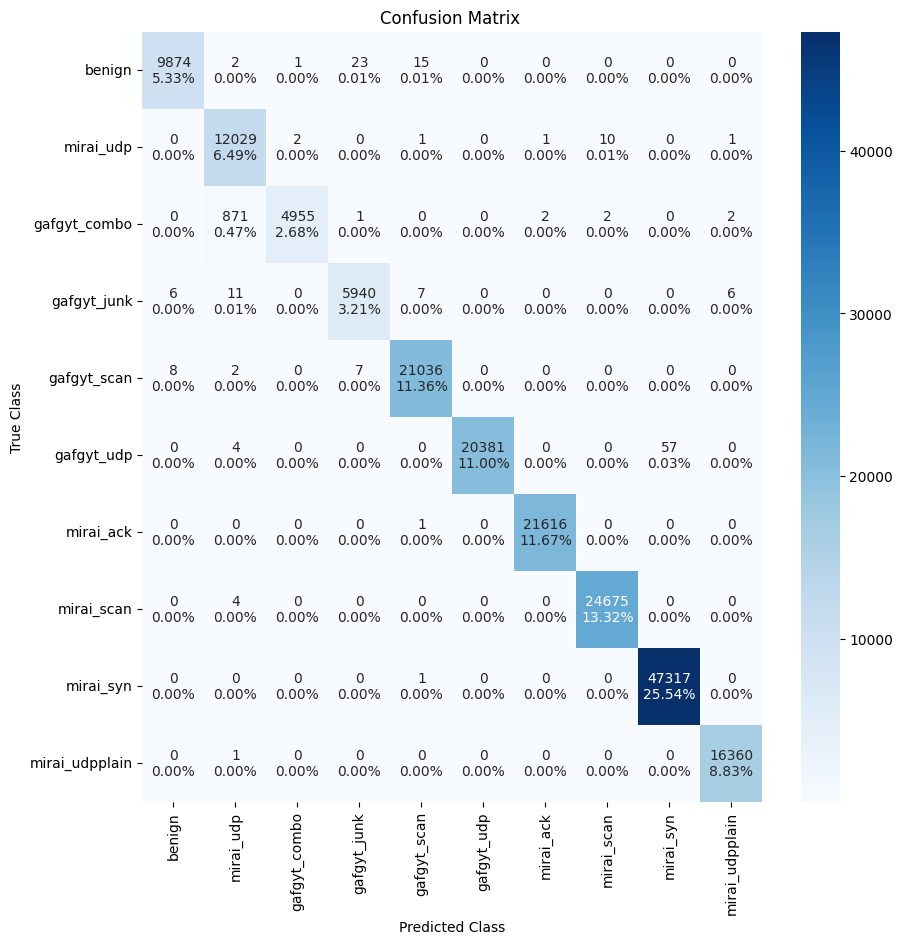

In [20]:

from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support,  roc_curve, auc
import tensorflow as tf 
#model = tf.keras.models.load_model('/'+model_name+'.h5')

y_pred = model.predict(x_test_cnn)

y_pred_cm  = np.argmax(y_pred, axis=1)
y_test_cm  = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_cm, y_pred_cm) 

group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(10,10)

label = ['benign','mirai_udp','gafgyt_combo','gafgyt_junk','gafgyt_scan','gafgyt_udp'\
        ,'mirai_ack','mirai_scan','mirai_syn','mirai_udpplain']

plt.figure(figsize=(10,10))
sns.heatmap(cm, xticklabels=label, yticklabels=label, annot=labels, fmt='', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix ')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.savefig('./''Confusion_matrix.png')
plt.show()

In [21]:
report = classification_report(y_test_cm, y_pred_cm, target_names= ['benign','mirai_udp','gafgyt_combo','gafgyt_junk','gafgyt_scan','gafgyt_udp','mirai_ack','mirai_scan','mirai_syn','mirai_udpplain'])
print (report)




                precision    recall  f1-score   support

        benign       1.00      1.00      1.00      9915
     mirai_udp       0.93      1.00      0.96     12044
  gafgyt_combo       1.00      0.85      0.92      5833
   gafgyt_junk       0.99      0.99      0.99      5970
   gafgyt_scan       1.00      1.00      1.00     21053
    gafgyt_udp       1.00      1.00      1.00     20442
     mirai_ack       1.00      1.00      1.00     21617
    mirai_scan       1.00      1.00      1.00     24679
     mirai_syn       1.00      1.00      1.00     47318
mirai_udpplain       1.00      1.00      1.00     16361

      accuracy                           0.99    185232
     macro avg       0.99      0.98      0.99    185232
  weighted avg       0.99      0.99      0.99    185232



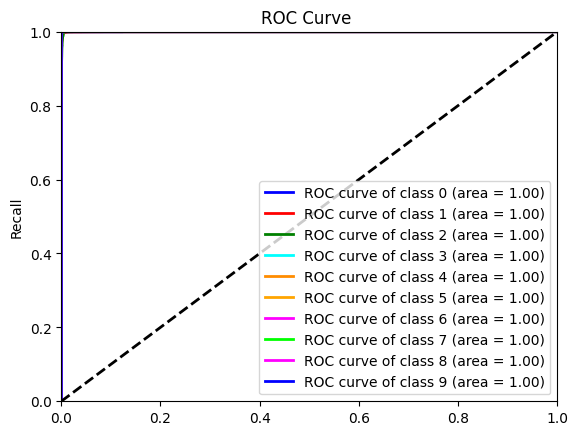

In [22]:
from itertools import cycle
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(labels.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green','aqua', 'darkorange', 'orange','fuchsia', 'lime','magenta'])
for i, color in zip(range(labels.shape[1]), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.title('ROC Curve ')
plt.legend(loc="lower right")
plt.savefig('./'+modelName+'_ROC.png')

plt.show()

In [23]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_roc(X_train, y_train, X_validate, y_val, X_test, y_test, model):
    """
    Plots ROC curve and confusion matrices for train, validation, and test sets for 10 classes.
    """
    n_classes = labels.shape[1]

    # Generate predicted probabilities for ROC curve
    y_train_prob = model.predict(X_train)
    y_val_prob = model.predict(X_validate)
    y_test_prob = model.predict(X_test)

    # Compute ROC curve and AUC for train, validation, and test sets for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_test_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    plt.figure(figsize=(8, 6))
    colors = itertools.cycle(['darkorange', 'green', 'blue', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'yellow', 'teal', 'magenta', 'indigo', 'black']
)
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class %d (AUC = %0.2f)' % (i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Test Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_train[:, i], y_train_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    plt.figure(figsize=(8, 6))
    colors = itertools.cycle(['darkorange', 'green', 'blue', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'yellow', 'teal', 'magenta', 'indigo', 'black'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class %d (AUC = %0.2f)' % (i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Train Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_val[:, i], y_val_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    plt.figure(figsize=(8, 6))
    colors = itertools.cycle(['darkorange', 'green', 'blue', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'yellow', 'teal', 'magenta', 'indigo', 'black'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class %d (AUC = %0.2f)' % (i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Val Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    


20260/20260 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step
2895/2895 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
5789/5789 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


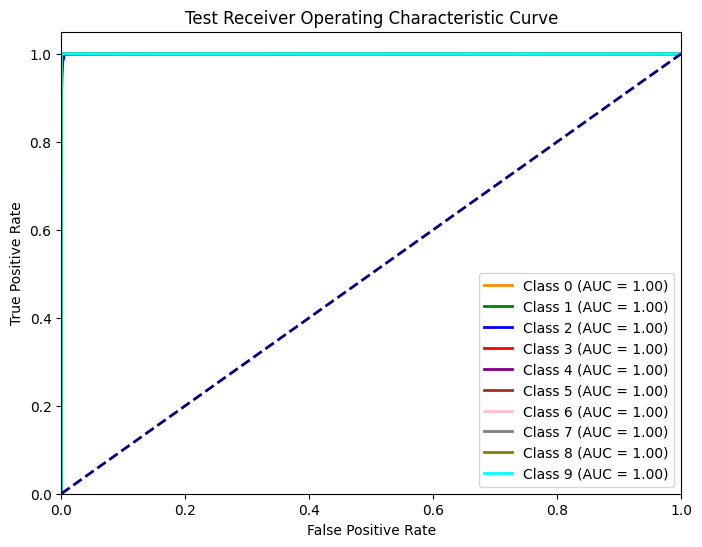

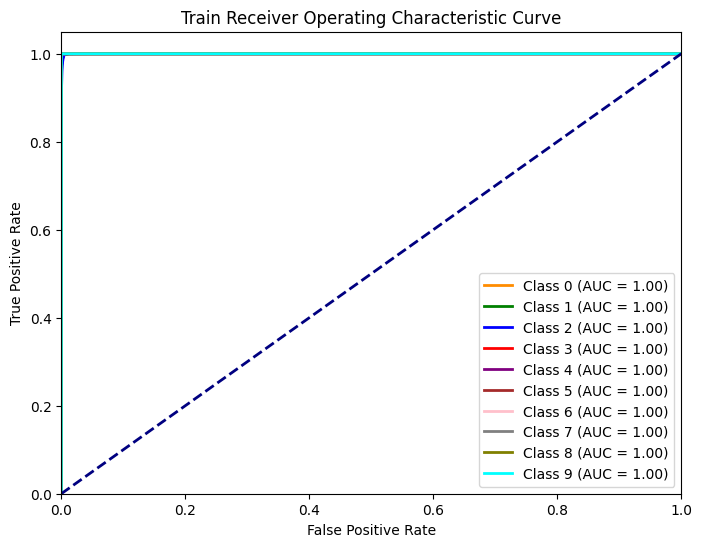

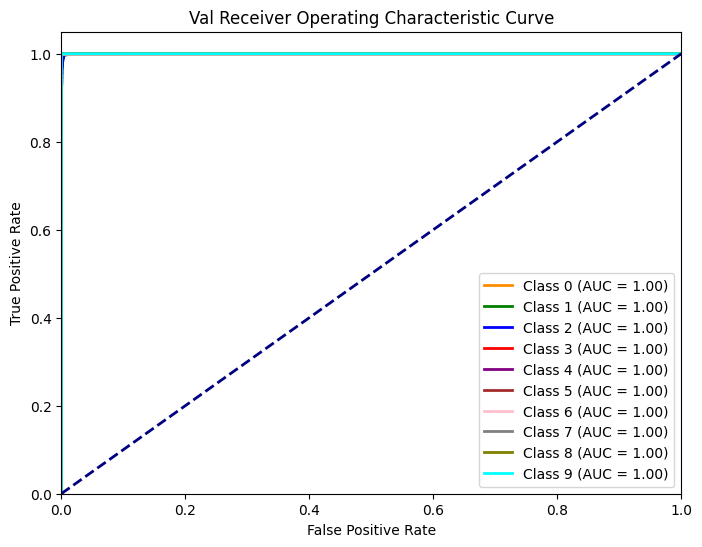

In [24]:
plot_roc(x_train_cnn, y_train, x_validate_cnn, y_validate, x_test_cnn, y_test, model)